<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Ionosphere-Data" data-toc-modified-id="Ionosphere-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ionosphere Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Plot-Kernels" data-toc-modified-id="Plot-Kernels-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Kernels</a></span></li></ul></li><li><span><a href="#BEMKL" data-toc-modified-id="BEMKL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BEMKL</a></span><ul class="toc-item"><li><span><a href="#Non-Sparse" data-toc-modified-id="Non-Sparse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Non-Sparse</a></span></li><li><span><a href="#Kernel-Sparse" data-toc-modified-id="Kernel-Sparse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kernel-Sparse</a></span></li><li><span><a href="#data-sparse" data-toc-modified-id="data-sparse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>data-sparse</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#data-and-kernel-sparse" data-toc-modified-id="data-and-kernel-sparse-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>data and kernel sparse</a></span></li><li><span><a href="#Sparsity-plots" data-toc-modified-id="Sparsity-plots-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Sparsity plots</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd

import scipy as sc
from scipy.io import loadmat

import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

import time

import util
from util import *
import plot
import bemkl_binary


np.random.seed(123)

# Prepare Data

1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial 
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
3. Kernel Preprocessing


## Ionosphere Data

In [2]:
reload(util)


X_ion, y_ion  = util.get_iono_data()
X_ion = util.preprocess_feats(X_ion)

N = int(X_ion.shape[0]*.75)

K_ion = util.get_kernels(X_ion, poly=True, feat_kernel=True, gauss=True, max_gauss_width=3, min_gauss_width=-1)

K_ion = util.preprocess_kernel(K_ion)
K, K_test = K_ion[:,:N,:N],K_ion[:,N:,:N]
y, y_test = y_ion[:N], y_ion[N:]

P = K.shape[0]

print 'Number of Kernels:', P
print 'Data Points:', X_ion.shape[0]
print 'Training Points:', N

util.py:204: RuntimeWarning: invalid value encountered in divide
  return (X-mean)/std


Number of Kernels: 280
Data Points: 351
Training Points: 263


## Plot Data

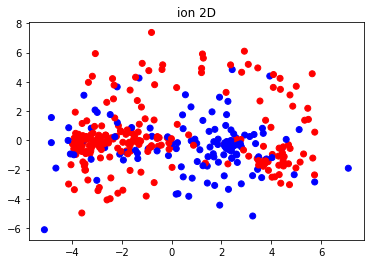

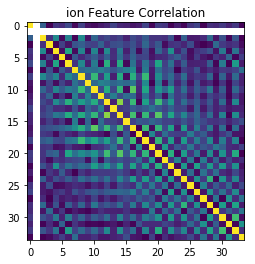

In [15]:
reload(plot)
plot.plot_data(X_ion,y_ion, 'ion')


## Plot Kernels

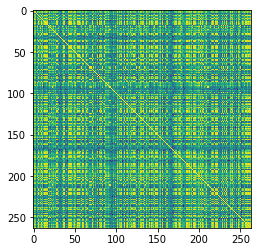

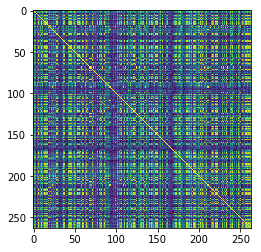

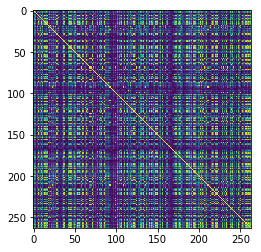

In [16]:
for i in range(3):
    plot.plot_kernel(K[i,...],'ion_k%d'%i)

# BEMKL

## Non-Sparse

In [20]:
reload(bemkl_binary)

nsp_clf = bemkl_binary.BEMKL(sparse=False)

t1 = time.time()

nsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = nsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.8977272727272727
Training Time: 32.0071289539


## Kernel-Sparse

In [22]:
sp_clf = bemkl_binary.BEMKL(sparse=True)

t1 = time.time()

sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.8863636363636364
Training Time: 33.6161940098


In [23]:
sp_clf.report_results()

Nmber of Chosen Kernels:
54
Nmber of Chosen Points:
144


## data-sparse

In [24]:
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)

t1 = time.time()

dsp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = dsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.8977272727272727
Training Time: 33.3578600883


In [25]:
dsp_clf.report_results()

Nmber of Chosen Kernels:
218
Nmber of Chosen Points:
10


## Cross Validation

In [5]:
## Cross Validation

print 'Cross Validation Results for Non-Sparse model:'
nsp_clf = bemkl_binary.BEMKL(sparse=False)
nsp_clf.evaluate_model(K_ion,y_ion)

print 'Cross Validation Results for Kernel-Sparse model:'
sp_clf = bemkl_binary.BEMKL(sparse=True)
sp_clf.evaluate_model(K_ion,y_ion)

print 'Cross Validation Results for Data-Sparse model:'
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)
dsp_clf.evaluate_model(K_ion,y_ion)

Cross Validation Results for Non-Sparse model:
Mean Accuracy: 0.9402012072434609
Cross Validation Results for Kernel-Sparse model:
Mean Accuracy: 0.934486921529175
Cross Validation Results for Data-Sparse model:
Mean Accuracy: 0.9230583501006036


## data and kernel sparse

In [ ]:
'''all_sp_clf = bemkl_binary.BEMKL(data_sparse=True, sparse=True)

t1 = time.time()

all_sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = all_sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff'''

## Sparsity plots

In [ ]:
plot.plot_results(nsp_clf, 'ion_nsp')
plot.plot_results(sp_clf, 'ion_sp')
plot.plot_results(dsp_clf, 'ion_dsp')
#plot.plot_results(all_sp_clf, 'ion_all_sp')
